In [ ]:
# import libraries
from cryptography.fernet import Fernet
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# open the key file
with open('filekey.key', 'rb') as f:
  key = f.read()

In [ ]:
# open the datafile
with open('marketing_dataset.csv', 'rb') as f:
  data = f.read()

In [ ]:
# store it in fernet
fernet = Fernet(key)

In [ ]:
# Decryption
decrypt_data = fernet.decrypt(data)

In [ ]:
# Overwrite
with open('marketing_dataset.csv', 'wb') as f:
  f.write(decrypt_data)

In [ ]:
# load the data
digital = pd.read_csv('marketing_dataset.csv')
digital.head()

,session_id,user_id,session_date,channel,device,is_mobile,mobile_os,pageviews,session_duration_sec,bounce,...,action,purchase_amount,email_sent,email_opens,email_clicks,email_unsubscribes,app_user,app_installed,push_sent,push_clicks
0,sess_000001,user_15796,28-03-2025,Organic,Desktop,0,NaN,2,196,0,...,0,0.0,0,0,0,0,0,0,0,0
1,sess_000002,user_861,04-09-2025,Referral,Desktop,0,NaN,1,51,0,...,0,0.0,0,0,0,0,0,0,0,0
2,sess_000003,user_54887,14-07-2025,Direct,Desktop,0,NaN,2,47,0,...,0,0.0,0,0,0,0,0,0,0,0
3,sess_000004,user_6266,18-02-2025,Social,Mobile,1,Android,2,44,0,...,0,0.0,0,0,0,0,0,0,0,0
4,sess_000005,user_37195,26-07-2025,Organic,Mobile,1,Android,4,5,0,...,0,0.0,0,0,0,0,0,0,0,0


In [ ]:
# shape of the data
digital.shape

(100000, 33)

In [ ]:
# Missing Values
digital.isna().sum()

,0
session_id,0
user_id,0
session_date,0
channel,0
device,0
is_mobile,0
mobile_os,50193
pageviews,0
session_duration_sec,0
bounce,0


In [ ]:
# Missing data
missing_rows = digital[digital.isna().any(axis=1)]
all_missing_due_desktop_access = (missing_rows['is_mobile'] == 0).all()
print("Are all missing values only where no purchase happened? :", all_missing_due_desktop_access)

Are all missing values only where no purchase happened? : True


LANDING PAGE METRICS

In [ ]:
# mean sessions duration
mean_duration = digital['session_duration_sec'].mean()
print('The mean duration of the sessions is', round(mean_duration,2))

The mean duration of the sessions is 95.9


In [ ]:
# Highest Session Duration
high_duration = digital['session_duration_sec'].max()
print('The highest duration of the sessions is', round(high_duration,2))

The highest duration of the sessions is 1921


In [ ]:
# Lowest Session Duration
lowest_duration = digital['session_duration_sec'].min()
print('The lowest duration of the sessions is', round(lowest_duration,2))

The lowest duration of the sessions is 1


In [ ]:
# Bounce Rate
single_page_sessions = digital[digital['pageviews'] == 1].shape[0]
total_sessions = digital.shape[0]
bounce_rate = (single_page_sessions / total_sessions) * 100
print('The bounce rate is', round(bounce_rate,2), '%')

The bounce rate is 10.85 %


In [ ]:
# Click Through Rate
number_of_clicks = digital['ad_clicks'].sum()
number_of_impressions = digital['ad_impressions'].sum()
click_through_rate = (number_of_clicks / number_of_impressions) * 100
print('The click through rate is', round(click_through_rate,2), '%')

The click through rate is 4.51 %


SOCIAL MEDIA METRICS

In [ ]:
# User Engagement
total_engagement = digital['social_likes'].sum() + digital['social_comments'].sum() + digital['social_shares'].sum()
social_reach = digital['social_reach'].sum()
user_engagement = (total_engagement / social_reach) * 100
print('The user engagement is', round(user_engagement,2), '%')

The user engagement is 6.44 %


In [ ]:
# Impressions based on users and device
digital['total_impressions'] = digital['social_impressions'].sum() + digital['ad_impressions'].sum()
impression_device = digital.groupby(['user_id', 'device'])['total_impressions'].sum().sort_values(ascending = False)
impression_device.head()

,,total_impressions
user_id,device,
user_26026,Mobile,101305267
user_5802,Mobile,101305267
user_61440,Mobile,101305267
user_10560,Desktop,101305267
user_65264,Mobile,86833086


In [ ]:
# Reach
reach = digital.groupby(['channel', 'device'])['user_id'].nunique().sort_values(ascending = False)
print(reach)

channel      device 
Organic      Mobile     13420
             Desktop    12379
Social       Mobile      9348
Paid Search  Mobile      9259
Social       Desktop     8509
Paid Search  Desktop     8420
Direct       Mobile      7203
             Desktop     6539
Email        Mobile      4779
             Desktop     4363
Referral     Mobile      2387
             Desktop     2169
Organic      Tablet      1440
Social       Tablet       996
Paid Search  Tablet       954
Direct       Tablet       768
Email        Tablet       500
Referral     Tablet       260
Name: user_id, dtype: int64


In [ ]:
# Virality
avg_social_shares = digital['social_shares'].mean()
total_users = digital['user_id'].nunique()
conversion_rate = (digital['action'] == 1).sum()/total_users
Virality = avg_social_shares * conversion_rate
print('The virality is', round(Virality,2))

The virality is 0.01


K < 1 : - Content Not Viral<br>
K = 1 : Stable Growth<br>
K > 1 : Viral Content

In [ ]:
# Sentiment
sentiment_counts = digital['sentiment_label'].value_counts(normalize =  True) * 100
sentiment_counts

,proportion
sentiment_label,
neutral,85.846
positive,9.244
negative,4.910


In [ ]:
digital.columns

Index(['session_id', 'user_id', 'session_date', 'channel', 'device',
       'is_mobile', 'mobile_os', 'pageviews', 'session_duration_sec', 'bounce',
       'ad_impressions', 'ad_clicks', 'social_impressions', 'social_reach',
       'social_likes', 'social_comments', 'social_shares',
       'social_engagements', 'sentiment_score', 'sentiment_label', 'awareness',
       'interest', 'desire', 'action', 'purchase_amount', 'email_sent',
       'email_opens', 'email_clicks', 'email_unsubscribes', 'app_user',
       'app_installed', 'push_sent', 'push_clicks', 'total_impressions'],
      dtype='object')

EMAIL MARKETING ANALYTICS

In [ ]:
# Open Rate
email_open_rate = digital['email_opens'].sum()/digital['email_sent'].sum() * 100
print('The open rate is', round(email_open_rate,2), '%')

The open rate is 24.49 %


In [ ]:
# CTR
email_click_rate = digital['email_clicks'].sum()/digital['email_sent'].sum() * 100
print('The click through rate is', round(email_click_rate,2), '%')

The click through rate is 3.21 %


In [ ]:
# Unsubscribe Rate
unsubscribe_rate = digital['email_unsubscribes'].sum()/digital['email_sent'].sum() * 100
print('The unsubscribe rate is', round(unsubscribe_rate,2), '%')

The unsubscribe rate is 0.25 %


APP ANALYTICS

In [ ]:
# App Usage Rate
app_usage_rate = digital['app_user'].sum()/digital['user_id'].nunique() * 100
print('The App usege rate is', round(app_usage_rate,2))

The App usege rate is 7.54


In [ ]:
# Push Rate
push_rate = digital['push_clicks'].sum()/digital['push_sent'].sum() * 100
print("The push rate is", round(push_rate,2))

The push rate is 3.31


FUNNEL ANALYTICS

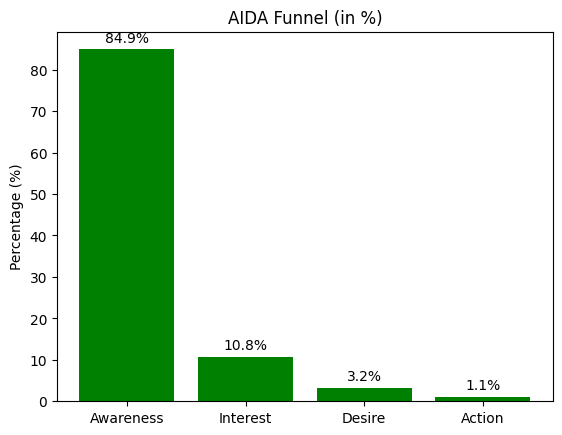

In [ ]:
funnel = {'Awareness': digital['awareness'].sum(), 'Interest': digital['interest'].sum(), 'Desire': digital['desire'].sum(), 'Action': digital['action'].sum()}

# Calculate percentages
total = sum(funnel.values())
percentages = [value / total * 100 for value in funnel.values()]

# Plot bar chart
bars = plt.bar(funnel.keys(), percentages, color='green')
plt.title('AIDA Funnel (in %)')
plt.ylabel('Percentage (%)')

# Add percentage labels directly
plt.bar_label(bars, labels=[f"{p:.1f}%" for p in percentages], padding=3)

plt.show()